Download two CSV files and place them in the data folder of your local Data Question 1 repository:

You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. Here is a link to a cheat sheet showing the basics of styling text using Markdown.
In the first cell of your notebook, import the required packages with their customary aliases as 

Keep all imports in this cell at the top of your notebook.

At the bottom of your imports cell, use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

Take a look at the first 10 rows.
Look at the last 5 rows. Do you see a problem?
Redo the read_csv() call to correct this issue - do not modify the original csv file.
Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')[: -2]

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [4]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
...,...,...,...,...
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN


In [5]:
gdp_df = gdp_df.drop(['Value Footnotes'], axis = 1)
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834
...,...,...,...
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849


7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
Country           6729 non-null object
Year              6729 non-null object
GDP_Per_Capita    6729 non-null float64
dtypes: float64(1), object(2)
memory usage: 157.8+ KB


6729 rows of actual data, 3 columns.

In [7]:
gdp_df = gdp_df[: -2]

In [8]:
gdp_df.Year = gdp_df.Year.astype(int)
gdp_df.head()

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [9]:
gdp_df['Year'].value_counts().sort_index()

1990    209
1991    210
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

inconsistent numbers of observations per year

9. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [10]:
gdp_df.groupby('Country')['Year'].nunique()

Country
Afghanistan            17
Albania                29
Algeria                29
Angola                 29
Antigua and Barbuda    29
                       ..
West Bank and Gaza     25
World                  29
Yemen                  29
Zambia                 29
Zimbabwe               27
Name: Year, Length: 243, dtype: int64

(will come back to answer)

10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

11. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [11]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


...some of this looks wrong

12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

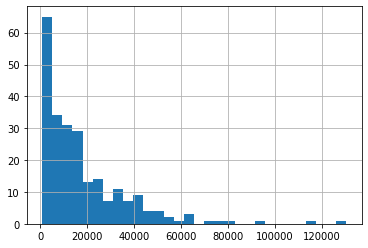

In [12]:
gdp_2014['GDP_Per_Capita'].hist(bins = 30);

need to describe...

3. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [13]:
gdp_2014.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.


In [14]:
gdp_pivoted = gdp_df.pivot_table(columns = ['Year'], index = ['Country'], values = 'GDP_Per_Capita')[[1990, 2017]].dropna()

In [15]:
gdp_pivoted.head()

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104


15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

>>> df.pct_change()
                  FR        GR        IT
1980-01-01       NaN       NaN       NaN
1980-02-01  0.013810  0.013684  0.006549
1980-03-01  0.053365  0.059318  0.061876

Percentage of change in GOOG and APPL stock volume. Shows computing
the percentage change between columns.

>>> df = pd.DataFrame({
...     '2016': [1769950, 30586265],
...     '2015': [1500923, 40912316],
...     '2014': [1371819, 41403351]},
...     index=['GOOG', 'APPL'])
>>> df
          2016      2015      2014
GOOG   1769950   1500923   1371819
APPL  30586265  40912316  41403351

>>> df.pct_change(axis='columns')
      2016      2015      2014
GOOG   NaN -0.151997 -0.086016
APPL   NaN  0.337604  0.012002
File:      c:\users\owner\anaconda3\lib\site-packages\pandas\core\generic.py
Type:      method

In [16]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2017] - gdp_pivoted[1990])/gdp_pivoted[1990]

In [17]:
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972
...,...,...,...
Venezuela,14619.454190,11489.648818,-21.408497
Vietnam,1457.594613,6233.485045,327.655604
World,8966.014072,15527.280228,73.179298


In [18]:
gdp_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, Albania to Zambia
Data columns (total 3 columns):
1990              208 non-null float64
2017              208 non-null float64
Percent_Change    208 non-null float64
dtypes: float64(3)
memory usage: 6.5+ KB


In [19]:
gdp_pivoted.columns

Index([1990, 2017, 'Percent_Change'], dtype='object', name='Year')

also tried... gdp_pivoted['Percent_Change'] = gdp_pivoted.apply(lambda row:(100*(row['2017'] - row['1990']) / row['1990']))
gdp_pivoted.head()

16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [20]:
neg_change = gdp_pivoted[gdp_pivoted['Percent_Change'] < 0]
print(neg_change['Percent_Change'].sort_values(ascending = False))

Country
Comoros                     -0.950753
Kyrgyz Republic             -2.332596
Aruba                       -3.441561
Guinea-Bissau               -3.480873
Congo                       -4.130734
The Gambia                  -8.501789
The Bahamas                 -8.667873
Brunei                     -14.369026
Madagascar                 -14.503975
Gabon                      -17.445359
Haiti                      -19.828931
Tajikistan                 -20.147445
Venezuela                  -21.408497
Central African Republic   -24.039332
Ukraine                    -24.440266
Yemen                      -29.812379
Burundi                    -34.710993
United Arab Emirates       -40.829500
Dem. Rep. Congo            -41.759785
Name: Percent_Change, dtype: float64


In [21]:
print(neg_change.shape)

(19, 3)


Twenty countries

17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?Bonus: Put both line charts on the same plot.

In [22]:
highest_change = (gdp_pivoted[gdp_pivoted['Percent_Change'] > 50].sort_values('Percent_Change', ascending = False))
print(highest_change['Percent_Change'])

Country
Equatorial Guinea                              2090.973464
China                                           902.257241
Myanmar                                         668.297629
East Asia & Pacific (excluding high income)     509.437318
East Asia & Pacific (IDA & IBRD)                509.209651
                                                  ...     
Canada                                           51.742785
United Kingdom                                   51.510571
Netherlands                                      51.087465
Belize                                           51.028481
European Union                                   50.466882
Name: Percent_Change, Length: 117, dtype: float64


In [23]:
# this was not practical...

gdp_pivoted_allyears = gdp_df.pivot_table(columns = ['Country'], index = 'Year', values = 'GDP_Per_Capita')

# dropna deleted numerous rows with one instance anywhere

gdp_pivoted_allyears

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,Aruba,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,World,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1990,NaN,4458.247115,10300.015042,4761.229638,17454.549799,10491.507721,11372.823108,3742.431024,37140.024657,28669.059474,...,9841.947945,3851.572604,2550.348904,14619.454190,1457.594613,NaN,8966.014072,3425.707169,2339.137959,NaN
1991,NaN,3229.250120,9929.097717,4651.204299,17598.378401,10243.813560,12238.788847,3335.595238,38562.960618,28193.528651,...,10118.456960,3751.770475,2558.105707,15671.799905,1512.269780,NaN,8942.915645,3466.039074,2278.802025,NaN
1992,NaN,3015.391377,9873.024864,4238.318419,17497.380127,10573.827918,13032.793286,1976.525218,38669.374901,27968.401884,...,10842.062014,3254.375512,2549.081095,16248.555062,1609.492026,NaN,8959.240204,3561.740073,2185.120656,2591.007534
1993,NaN,3323.864388,9453.323181,3118.903488,18055.500956,10618.558714,13919.403900,1845.314220,39051.995974,28812.100376,...,11048.652061,3108.086275,2494.681477,15937.294015,1705.335543,NaN,8984.696890,3519.550101,2278.347123,2572.870395
1994,NaN,3622.007101,9176.235569,3060.336207,18851.937822,10657.260745,14546.538787,1992.015239,39944.111433,29644.146020,...,11766.475121,2889.187663,2647.923540,15231.183400,1822.025810,3236.196368,9109.764275,3581.814359,2031.776457,2768.309953
1995,NaN,4129.975340,9344.748909,3407.974524,17645.173769,10613.855460,13959.999657,2173.358777,39113.471648,30411.705587,...,11512.956581,2811.915302,2610.629071,15503.474571,1962.305534,3314.761163,9271.364990,3628.620445,2038.510332,2736.486436
1996,NaN,4533.894357,9558.822868,3747.164004,18407.710553,10851.959106,14556.733575,2336.512137,38209.195426,31178.922164,...,12068.679732,2805.540215,2615.972553,15158.610119,2112.914861,3208.119899,9489.446042,3660.350262,2108.910953,2985.856605
1997,NaN,4064.132804,9509.123393,3892.473420,19000.281878,11067.833926,15556.017565,2441.179496,39824.290920,32055.011992,...,13009.003581,2896.308041,2694.309412,15805.159134,2253.625263,3517.569954,9725.189314,3729.732721,2130.519957,3036.422224
1998,NaN,4450.922523,9845.209222,3945.594930,19486.171892,11466.169109,15973.067259,2639.946771,39767.789395,33174.507097,...,13510.564006,2972.618190,2761.795702,15544.778404,2353.555715,3920.320010,9831.530107,3839.688064,2064.467651,3099.076182


In [24]:
two_highest_trend = gdp_pivoted_allyears[['Equatorial Guinea', 'China']]
# pd.DataFrame(two_highest_trend)
print(two_highest_trend)

Country  Equatorial Guinea         China
Year                                    
1990           1017.764136   1521.963868
1991            975.558189   1640.874263
1992           1272.159060   1851.315492
1993           1365.588482   2083.952315
1994           1538.475957   2329.474589
1995           1743.205357   2556.604860
1996           2796.398459   2781.130626
1997           6721.724501   3006.918054
1998           7991.571984   3211.623211
1999           9640.704755   3428.063172
2000          10937.697039   3689.967255
2001          17149.018503   3968.773863
2002          19655.328898   4302.226871
2003          21475.814494   4704.586800
2004          28384.466729   5149.601901
2005          31697.801471   5702.800579
2006          32618.640600   6392.373888
2007          35901.459696   7264.060036
2008          40368.079634   7924.644365
2009          39060.913034   8626.532479
2010          33990.146771   9498.079744
2011          34622.116266  10355.495713
2012          35

could adapt this from jumpstart

WZF = pd.DataFrame({
   'Work Zone Fatalities': [15, 7, 16, 12, 14, 21, 17, 13, 10, 20],
   'WZ Truck-involved Fatalities': [4, 0, 5, 6, 9, 5, 4, 2, 1, 7],
   'WZ worker Fatalities': [7, 3, 5, 9, 4, 5, 2, 5, 3, 5] 
   }, index=[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
WZFlines = WZF.plot.line()

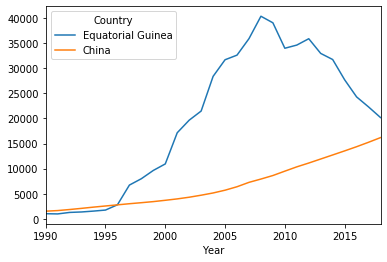

In [25]:
two_highest_trend.plot.line();

18. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [26]:
continents = pd.read_csv('../data/continents.csv')

In [27]:
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [28]:
gdp_df = gdp_df.merge(continents, on = ['Country'], how = 'inner')
gdp_df.head(200)

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia
...,...,...,...,...
195,Aruba,2013,36082.522486,North America
196,Aruba,2012,34830.976551,North America
197,Aruba,2011,35492.618487,North America
198,Aruba,2010,34437.494174,North America


20. Determine the number of countries per continent. Create a bar chart showing this.

NOPE

gdp_df = gdp_df.Continent.value_counts()
gdp_df

In [29]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia


In [30]:
gdp_df_a = gdp_df[['Country', 'Continent']].drop_duplicates()
gdp_df_a.head()

,Country,Continent
0,Afghanistan,Asia
17,Albania,Europe
46,Algeria,Africa
75,Angola,Africa
104,Antigua and Barbuda,North America


In [31]:
gdp_df_a['Continent'].value_counts()

Africa           51
Europe           45
Asia             44
North America    26
Oceania          14
South America    12
Name: Continent, dtype: int64

In [32]:
gdp_df_a = gdp_df_a['Continent'].value_counts()
gdp_df_a = gdp_df_a.to_frame()
gdp_df_a

,Continent
Africa,51
Europe,45
Asia,44
North America,26
Oceania,14
South America,12


another way
gdp_df_a.groupby(['Continent'])['Country'].nunique()

HAD TO CHANGE ABOVE
gdp_df_a.groupby('Continent')['Country'].count()

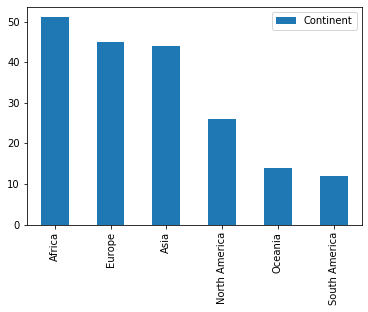

In [33]:
gdp_df_a.plot.bar()

21. Creat a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [34]:
gdp_2014_continents = gdp_2014.merge(continents, on = 'Country', how = 'inner') 
gdp_2014_continents.head(200)

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2014,1795.735834,Asia
1,Albania,2014,10700.993216,Europe
2,Algeria,2014,13557.769757,Africa
3,Angola,2014,6813.052106,Africa
4,Antigua and Barbuda,2014,20440.540555,North America
...,...,...,...,...
184,Vietnam,2014,5312.492183,Asia
185,West Bank and Gaza,2014,4445.307470,Asia
186,Yemen,2014,3828.484887,Asia
187,Zambia,2014,3684.685507,Africa


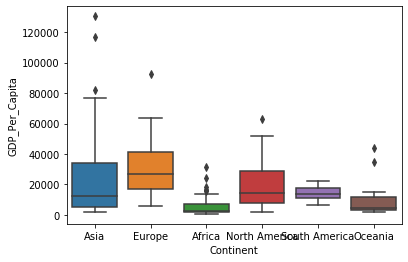

In [35]:
sns.boxplot(x="Continent", y="GDP_Per_Capita", data = gdp_2014_continents)

22. Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [36]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [37]:
internet_df = internet_df.drop(['Value Footnotes'], axis = 1)
internet_df = internet_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'Internet_Users_Pct'})
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [38]:
internet_df.shape

(4495, 3)

In [39]:
internet_df.dtypes

Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object

In [40]:
pd.to_numeric(internet_df['Internet_Users_Pct'])

0       6.390000
1       5.900000
2       5.454545
3       5.000000
4       4.000000
          ...   
4490    0.033080
4491    0.016790
4492    0.007684
4493    0.001739
4494    0.000000
Name: Internet_Users_Pct, Length: 4495, dtype: float64

25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [41]:
internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year')

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


1990, Italy

still need to plot...

26. Merge gdf_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.

In [42]:
gdp_and_internet_use = gdp_df.merge(internet_df, on = ['Country', 'Year'], how = 'inner')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000
...,...,...,...,...,...
3513,Zimbabwe,1998,3099.076182,Africa,0.081648
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684


265. Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

27. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

Yes they merged correctly, and the data is as expected.

28. Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the mean internet users percentage in 2014? How many countries have at least 90% internet users in 2014?

In [43]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.993216,Europe,60.10
34,Algeria,2014,13557.769757,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20440.540555,North America,64.00
...,...,...,...,...,...
3411,Vanuatu,2014,2837.122659,Oceania,18.80
3431,Venezuela,2014,17131.386907,South America,57.00
3455,Yemen,2014,3828.484887,Asia,22.55
3475,Zambia,2014,3684.685507,Africa,17.34


get mean users, and number of countries 90% use and above...

29. Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these five countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?

In [44]:
gdp_and_internet_use_2014.sort_values('Internet_Users_Pct', ascending = False)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1395,Iceland,2014,42774.888849,Europe,98.16
2310,Norway,2014,63328.259526,Europe,96.30
854,Denmark,2014,45057.083449,Europe,95.99
1812,Luxembourg,2014,92349.186429,Europe,94.67
2199,Netherlands,2014,46238.209707,Europe,93.17
...,...,...,...,...,...
2136,Myanmar,2014,4737.459861,Asia,2.10
2270,Niger,2014,900.136918,Africa,1.95
1275,Guinea,2014,1836.532318,Africa,1.72
539,Burundi,2014,768.469837,Africa,1.38


In [45]:
top5_internet_2014 = gdp_and_internet_use_2014.sort_values('Internet_Users_Pct', ascending = False)

In [46]:
top5_internet_2014 = top5_internet_2014.head()
top5_internet_2014

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1395,Iceland,2014,42774.888849,Europe,98.16
2310,Norway,2014,63328.259526,Europe,96.30
854,Denmark,2014,45057.083449,Europe,95.99
1812,Luxembourg,2014,92349.186429,Europe,94.67
2199,Netherlands,2014,46238.209707,Europe,93.17


In [47]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [48]:
top5_internet_allyears = gdp_and_internet_use[gdp_and_internet_use['Country']== 'Iceland']
top5_internet_allyears
#it worked!

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1395,Iceland,2014,42774.888849,Europe,98.160000
1396,Iceland,2013,42371.959961,Europe,96.546800
1397,Iceland,2012,41076.606122,Europe,96.209800
1398,Iceland,2011,40767.236414,Europe,94.819687
1399,Iceland,2010,40136.737154,Europe,93.390000
1400,Iceland,2009,41505.084834,Europe,93.000000
1401,Iceland,2008,44674.657124,Europe,91.000000
1402,Iceland,2007,44624.279895,Europe,90.600000
1403,Iceland,2006,41848.471696,Europe,89.510000
1404,Iceland,2005,40705.874789,Europe,87.000000


In [49]:
top5 = ['Iceland', 'Norway', 'Denmark', 'Luxembourg', 'Netherlands']

In [50]:
top5_internet_allyears = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top5)]
top5_internet_allyears

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
854,Denmark,2014,45057.083449,Europe,95.990000
855,Denmark,2013,44564.453068,Europe,94.629700
856,Denmark,2012,44336.817026,Europe,92.260012
857,Denmark,2011,44403.384841,Europe,89.810013
858,Denmark,2010,43998.426101,Europe,88.720000
...,...,...,...,...,...
2330,Norway,1994,48256.628500,Europe,4.152450
2331,Norway,1993,46196.737287,Europe,2.783991
2332,Norway,1992,45186.822152,Europe,2.216366
2333,Norway,1991,43879.942970,Europe,1.407395


#nope
top5_grid = sns.FacetGrid(top5_internet_allyears, col="Time",  row="Internet Use Percentage")
top5_grid.top5_internet_all_years(sns.histplot, x="Year")

sns.FacetGrid(top5_internet_allyears)

top5_grid = sns.FacetGrid(top5_internet_allyears, col="Year",  row="Internet_Users_Pct")
top5_grid.map_dataframe(sns.histplot, x=1)
#ran forever...

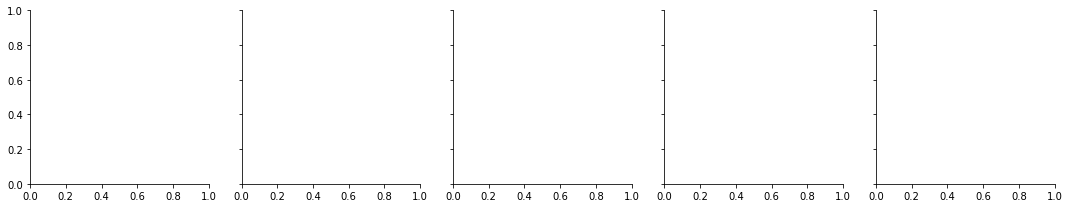

In [51]:
top5_grid = sns.FacetGrid(top5_internet_allyears, col = 'Country')

In [62]:
top5_grid.map(plt.hist, 'Internet_Users_Pct')

ValueError: Axes instance argument was not found in a figure

tried everything...

30. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?

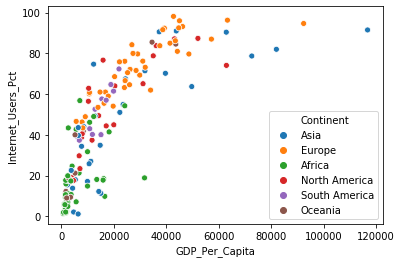

In [64]:
sns.scatterplot(data=gdp_and_internet_use_2014, x="GDP_Per_Capita", y="Internet_Users_Pct", hue="Continent");

31. Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

In [68]:
correlation = gdp_and_internet_use_2014['GDP_Per_Capita'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])

In [69]:
print(correlation)

0.7879885707262836


A correlation of 1 being 'perfect,' these variables are moderately to strongly correlated.

32. Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

In [71]:
gdp_and_internet_use_2014['log_GDP'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])
gdp_and_internet_use_2014.head()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,log_GDP
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.993216,Europe,60.10,9.278092
34,Algeria,2014,13557.769757,Africa,18.09,9.514715
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20440.540555,North America,64.00,9.925275


33. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

In [72]:
United_States_GDP_Internet = gdp_and_internet_use[gdp_and_internet_use['Country']== 'United States']
United_states_GDP_Internet

NameError: name 'United_states_GDP_Internet' is not defined

In [74]:
United_States_GDP_Internet = gdp_and_internet_use[gdp_and_internet_use['Country']== 'United States']
United_States_GDP_Internet

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3343,United States,2014,52080.792568,North America,87.360000
3344,United States,2013,51208.892428,North America,84.200000
3345,United States,2012,50632.443448,North America,79.300000
3346,United States,2011,49883.113984,North America,69.729461
3347,United States,2010,49479.248679,North America,71.690000
3348,United States,2009,48644.151110,North America,71.000000
3349,United States,2008,50349.715322,North America,74.000000
3350,United States,2007,50897.731238,North America,75.000000
3351,United States,2006,50437.806235,North America,68.931193
3352,United States,2005,49512.926789,North America,67.968053


In [76]:
# or...
United_States_GDP_Internet = gdp_and_internet_use[6387:6415]
United_States_GDP_Internet
#...not

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct


335. Solo Exploration and Presentation:  Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to merge with your data and explore. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations you find. Include visualizations and consider adding interactivity with ipywidgets. This presentation can be done either in a Jupyter Notebook or using another presentation software, such as PowerPoint. (Check out Jupyter Slides if you have time. This allows you to turn your jupyter notebook into a slideshow.

UN Dataset: "Central government expenditure allocated to education"

In [88]:
education = pd.read_csv('../data/education.csv')
education.head()

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Algeria,Total,2007-2010,UN_World Bank,Percent,4.0,1.0
1,Andorra,Total,2007-2010,UN_World Bank,Percent,4.0,1.0
2,Angola,Total,2007-2010,UN_World Bank,Percent,3.0,1.0
3,Antigua and Barbuda,Total,2007-2010,UN_World Bank,Percent,2.0,1.0
4,Argentina,Total,2007-2010,UN_World Bank,Percent,6.0,1.0


In [89]:
gdp_pivoted_allyears.tail()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,Aruba,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,World,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2014,1795.735834,10700.993216,13557.769757,6813.052106,20440.540555,15286.726815,18935.002497,7954.195331,36172.933355,43651.103133,...,19939.005008,6498.139042,2837.122659,17131.386907,5312.492183,4445.307470,14514.392218,3828.484887,3684.685507,2506.490220
2015,1766.593077,10970.321401,13774.758920,6644.857255,20994.725890,15451.349481,19243.579469,8171.832354,35814.261438,43970.803704,...,19945.034681,6861.369369,2766.864565,16045.982339,5608.471859,4493.612080,14828.598884,3108.764217,3677.735019,2509.008140
2016,1757.023490,11352.101422,13926.910489,6258.376628,21923.796037,15685.811076,18645.091851,8158.634794,35557.656862,44488.740828,...,20210.257683,7154.029072,2789.624867,13416.795507,5895.628492,4600.685400,15142.226499,2619.050681,3703.012866,2489.097494
2017,1758.465636,11796.719185,13822.389087,6044.972035,22400.379562,15542.746104,18945.144022,8744.731368,35861.828118,44781.322760,...,20658.474441,7348.450084,2839.128177,11489.648818,6233.485045,4651.723645,15527.280228,2404.422370,3717.667166,2568.410072
2018,1734.723214,12316.071501,13737.356063,5725.327238,23840.729896,15590.398354,18288.244599,9177.744159,NaN,45377.755143,...,20916.150184,7591.986727,2858.202369,9401.622748,6608.621686,4576.432497,15914.172172,2284.970504,3747.972455,2688.406942


In [90]:
education = education.drop(['Value Footnotes'], axis = 1)
education = education.rename(columns = {'Country or Area' : 'Country', 'Value' : 'Cent_Gov_Expend_Pct'})
education.head()

,Country,Subgroup,Year,Source,Unit,Cent_Gov_Expend_Pct
0,Algeria,Total,2007-2010,UN_World Bank,Percent,4.0
1,Andorra,Total,2007-2010,UN_World Bank,Percent,4.0
2,Angola,Total,2007-2010,UN_World Bank,Percent,3.0
3,Antigua and Barbuda,Total,2007-2010,UN_World Bank,Percent,2.0
4,Argentina,Total,2007-2010,UN_World Bank,Percent,6.0


In [91]:
education_and_gdp = education.merge(gdp_2014, on = ['Country'], how = 'inner')
education_and_gdp = education_and_gdp.merge(continents, on = ['Country'], how = 'inner') 
education_and_gdp

,Country,Subgroup,Year_x,Source,Unit,Cent_Gov_Expend_Pct,Year_y,GDP_Per_Capita,Continent
0,Algeria,Total,2007-2010,UN_World Bank,Percent,4.0,2014,13557.769757,Africa
1,Angola,Total,2007-2010,UN_World Bank,Percent,3.0,2014,6813.052106,Africa
2,Antigua and Barbuda,Total,2007-2010,UN_World Bank,Percent,2.0,2014,20440.540555,North America
3,Argentina,Total,2007-2010,UN_World Bank,Percent,6.0,2014,18935.002497,South America
4,Armenia,Total,2007-2010,UN_World Bank,Percent,4.0,2014,7954.195331,Europe
...,...,...,...,...,...,...,...,...,...
114,United States,Total,2007-2010,UN_World Bank,Percent,5.0,2014,52080.792568,North America
115,Vanuatu,Total,2007-2010,UN_World Bank,Percent,5.0,2014,2837.122659,Oceania
116,Yemen,Total,2007-2010,UN_World Bank,Percent,5.0,2014,3828.484887,Asia
117,Zambia,Total,2007-2010,UN_World Bank,Percent,1.0,2014,3684.685507,Africa


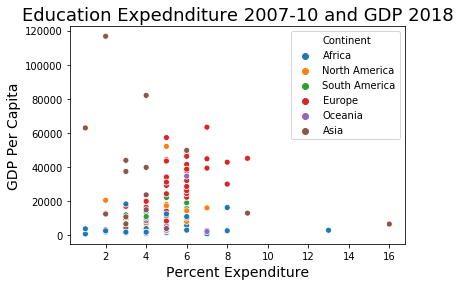

In [106]:
sns.scatterplot(data = education_and_gdp, x = 'Cent_Gov_Expend_Pct', y = 'GDP_Per_Capita', hue = 'Continent');
plt.xlabel('Percent Expenditure', size = 14)
plt.ylabel('GDP Per Capita', size = 14)
plt.title('Education Expednditure 2007-10 and GDP 2018', size=18);

In [95]:
ed_compare = gdp_pivoted_allyears[['United Kingdom', 'Finland', 'United States', 'Australia', 'France', 'Spain', 'China']]

In [97]:
ed_compare

Country,United Kingdom,Finland,United States,Australia,France,Spain,China
Year,,,,,,,
1990,26551.720271,28814.304255,36812.545745,28669.059474,29464.068537,23797.926264,1521.963868
1991,26181.772555,26963.023435,36284.582233,28193.528651,29608.370963,24341.786168,1640.874263
1992,26207.943344,25921.472695,37045.330120,27968.401884,29932.701978,24447.944374,1851.315492
1993,26805.704374,25618.623407,37566.468232,28812.100376,29615.923239,24070.624997,2083.952315
1994,27778.963854,26512.061130,38603.651201,29644.146020,30201.738181,24527.222338,2329.474589
1995,28695.105446,27524.972364,39170.656714,30411.705587,30726.795507,25092.564281,2556.604860
1996,29335.263017,28440.947813,40178.202688,31178.922164,31050.822850,25653.086102,2781.130626
1997,30387.722061,30152.663625,41462.801461,32055.011992,31664.052147,26491.647542,3006.918054
1998,31403.664328,31713.790721,42818.852352,33174.507097,32679.688245,27541.220691,3211.623211


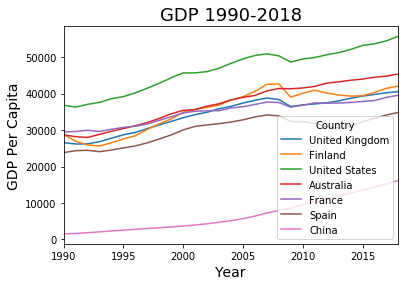

In [104]:
ed_compare.plot.line();
plt.xlabel('Year', size = 14)
plt.ylabel('GDP Per Capita', size = 14)
plt.title('GDP 1990-2018', size=18);

336. If time allows, check out the plotly library to add additional interativity to your plots. https://plotly.com/python/plotly-express/).